## **数据详情**

    Date：The date of observation
    Location：The common name of the location of the weather station
    MinTemp：The minimum temperature in degrees celsius
    MaxTemp：The maximum temperature in degrees celsius
    Rainfall：The amount of rainfall recorded for the day in mm
    Evaporation：The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine：The number of hours of bright sunshine in the day.
    WindGustDir：The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed：The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am：Direction of the wind at 9am
    WindDir3pm：Direction of the wind at 3pm
    WindSpeed9am：Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm：Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am：Humidity (percent) at 9am
    Humidity3pm：Humidity (percent) at 3pm
    Pressure9am：Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm：Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am：Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
    Cloud3pm：Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
    Temp9am：Temperature (degrees C) at 9am
    Temp3pm：Temperature (degrees C) at 3pm
    RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RISK_MM：The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
    RainTomorrow：The target variable. Did it rain tomorrow?

特征详情：

    Date：观察特征的那一天
    Location：观察的城市
    MinTemp：当天最低温度（摄氏度）
    MaxTemp：当天最高温度（摄氏度）温度都是 string
    Rainfall：当天的降雨量（单位是毫米mm）
    Evaporation：一个凹地上面水的蒸发量（单位是毫米mm），24小时内到早上9点
    Sunshine：一天中出太阳的小时数
    WindGustDir：最强劲的那股风的风向，24小时内到午夜
    WindGustSpeed：最强劲的那股风的风速（km/h），24小时内到午夜
    WindDir9am：上午9点的风向
    WindDir3pm：下午3点的风向
    WindSpeed9am：上午9点之前的十分钟里的平均风速，即 8:50~9:00的平均风速，单位是（km/hr）
    WindSpeed3pm：下午3点之前的十分钟里的平均风速，即 14:50~15:00的平均风速，单位是（km/hr）
    Humidity9am：上午9点的湿度
    Humidity3pm：下午3点的湿度
    Pressure9am：上午9点的大气压强（hpa）
    Pressure3pm：下午3点的大气压强
    Cloud9am：上午9点天空中云的密度，取值是[0, 8]，以1位一个单位，0的话表示天空中几乎没云，8的话表示天空中几乎被云覆盖了
    Cloud3pm：下午3点天空中云的密度
    Temp9am：上午9点的温度（单位是摄氏度）
    Temp3pm：下午3点的温度（单位是摄氏度）
    RainTodayBoolean: 今天是否下雨
    RISK_MM：明天下雨的风险值（应当是数据提供者创建的一个特征）
    来自数据提供者的提醒：Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. 就是建模的时候要删掉这个特征
    RainTomorrow：标签

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
# 想法：特征创建提取月份，对月份进行独热编码

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


观察：

    1.一天中最低温度的最大值是33.9，最高温度的最大值是48.1 单看一个感觉有点不合理，两个最大值如果是同一天的话感觉有点说的过去 # todo 后面绘图看一下
    2.同样的，一天中降雨量最大的是371毫米，蒸发量最大是145毫米，这样应该说得过去，# todo 绘图观察 ---出现的那一天的月份和其他指标
    3.观察了上午9点和下午3点的温度，也可以和 1 联系起来

```
对于数据集，特征 Evaporation，Sunshine，Cloud9am，Cloud3pm 的缺失值基本都占到了百分之40
前两个都是连续值，后两个都是离散值，对于离散值，数据的随机缺失会对模型有比较大的影响

处理缺失值：
       1.把这些特征删除，但是感觉这些特征的权重会比较高，所以删除不见得是一个特别好的选择
       2.使用均值或中位数进行连续值特征的填补，使用众数进行离散值特征的填补，调参的时候拿去模型里面跑一跑
       3.对连续值进行均值填补，对离散值使用随机森林回归填补，可以尝试一下
```

### **数据探索**

In [6]:
import seaborn as sns

In [7]:
# 下雨的天数和不下雨的天数
df['RainTomorrow'].value_counts() / df.shape[0]

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

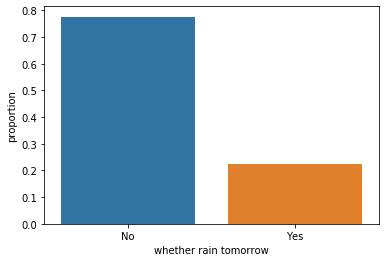

In [8]:
value_counts_ = df['RainTomorrow'].value_counts() / df.shape[0]

sns.barplot(x=value_counts_.index, y=value_counts_.values)
plt.xlabel('whether rain tomorrow')
plt.ylabel('proportion')
plt.show()

分析目标：

    1.什么特征和降雨有关系
    2.不同特征之间的的相关性怎么样

#### **什么特征和降雨有关系**

In [9]:
# 查看热力图，对于特征矩阵的每一列和标签之间的相关性得到相关系数
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [10]:
# 先对缺失值很少的特征进行均值的填充
from sklearn.preprocessing import Imputer


# df.drop(columns='RISK_MM', inplace=True)
columns_ = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' ,'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm', 'Temp9am','Temp3pm']

In [11]:
df.loc[:, columns_]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2


In [12]:
temp = df.loc[:, columns_]
temp.mean()

MinTemp            12.186400
MaxTemp            23.226784
Rainfall            2.349974
WindGustSpeed      39.984292
WindSpeed9am       14.001988
WindSpeed3pm       18.637576
Humidity9am        68.843810
Humidity3pm        51.482606
Pressure9am      1017.653758
Pressure3pm      1015.258204
Temp9am            16.987509
Temp3pm            21.687235
dtype: float64

In [13]:
temp_ = temp.copy()

for feature in temp.columns:
    temp_[feature].fillna(temp_[feature].mean(), inplace=True)

In [14]:
temp_.shape

(142193, 12)

In [15]:
temp_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 12 columns):
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
WindGustSpeed    142193 non-null float64
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
dtypes: float64(12)
memory usage: 13.0 MB


In [16]:
df_ = df.copy()

In [17]:
df_.loc[:, columns_] = temp_
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    142193 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        140787 non-null obje

In [18]:
df_.count() != 142193

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

In [19]:
df_.count()[df_.count() != 142193]

Evaporation     81350
Sunshine        74377
WindGustDir    132863
WindDir9am     132180
WindDir3pm     138415
Cloud9am        88536
Cloud3pm        85099
RainToday      140787
dtype: int64

In [20]:
# 估计 WindGustDir、WindDir9am、WindDir3pm对于模型的权重占比不会太高
# 直接删除缺失值
df_.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']).shape

(123710, 24)

经过去除上述特征的缺失值，大概减少了1/7的数据量

In [21]:
df_.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], inplace=True)

In [22]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 24 columns):
Date             123710 non-null object
Location         123710 non-null object
MinTemp          123710 non-null float64
MaxTemp          123710 non-null float64
Rainfall         123710 non-null float64
Evaporation      73063 non-null float64
Sunshine         67087 non-null float64
WindGustDir      123710 non-null object
WindGustSpeed    123710 non-null float64
WindDir9am       123710 non-null object
WindDir3pm       123710 non-null object
WindSpeed9am     123710 non-null float64
WindSpeed3pm     123710 non-null float64
Humidity9am      123710 non-null float64
Humidity3pm      123710 non-null float64
Pressure9am      123710 non-null float64
Pressure3pm      123710 non-null float64
Cloud9am         77476 non-null float64
Cloud3pm         75477 non-null float64
Temp9am          123710 non-null float64
Temp3pm          123710 non-null float64
RainToday        123710 non-null obje

#### 探索性数据分析--连续值特征随着日期的变化

In [23]:
# 将 Date特征的值转换为时间类型，按照日期进行排序
time_data = df_.copy()
time_data['Date'] = pd.to_datetime(time_data['Date'])
# 因为数据集里面的 Date的值就是按照时间顺序进行记录的，所以不用 sort_value()
time_data.set_index('Date', inplace=True)

In [24]:
time_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


IndexError: too many indices for array

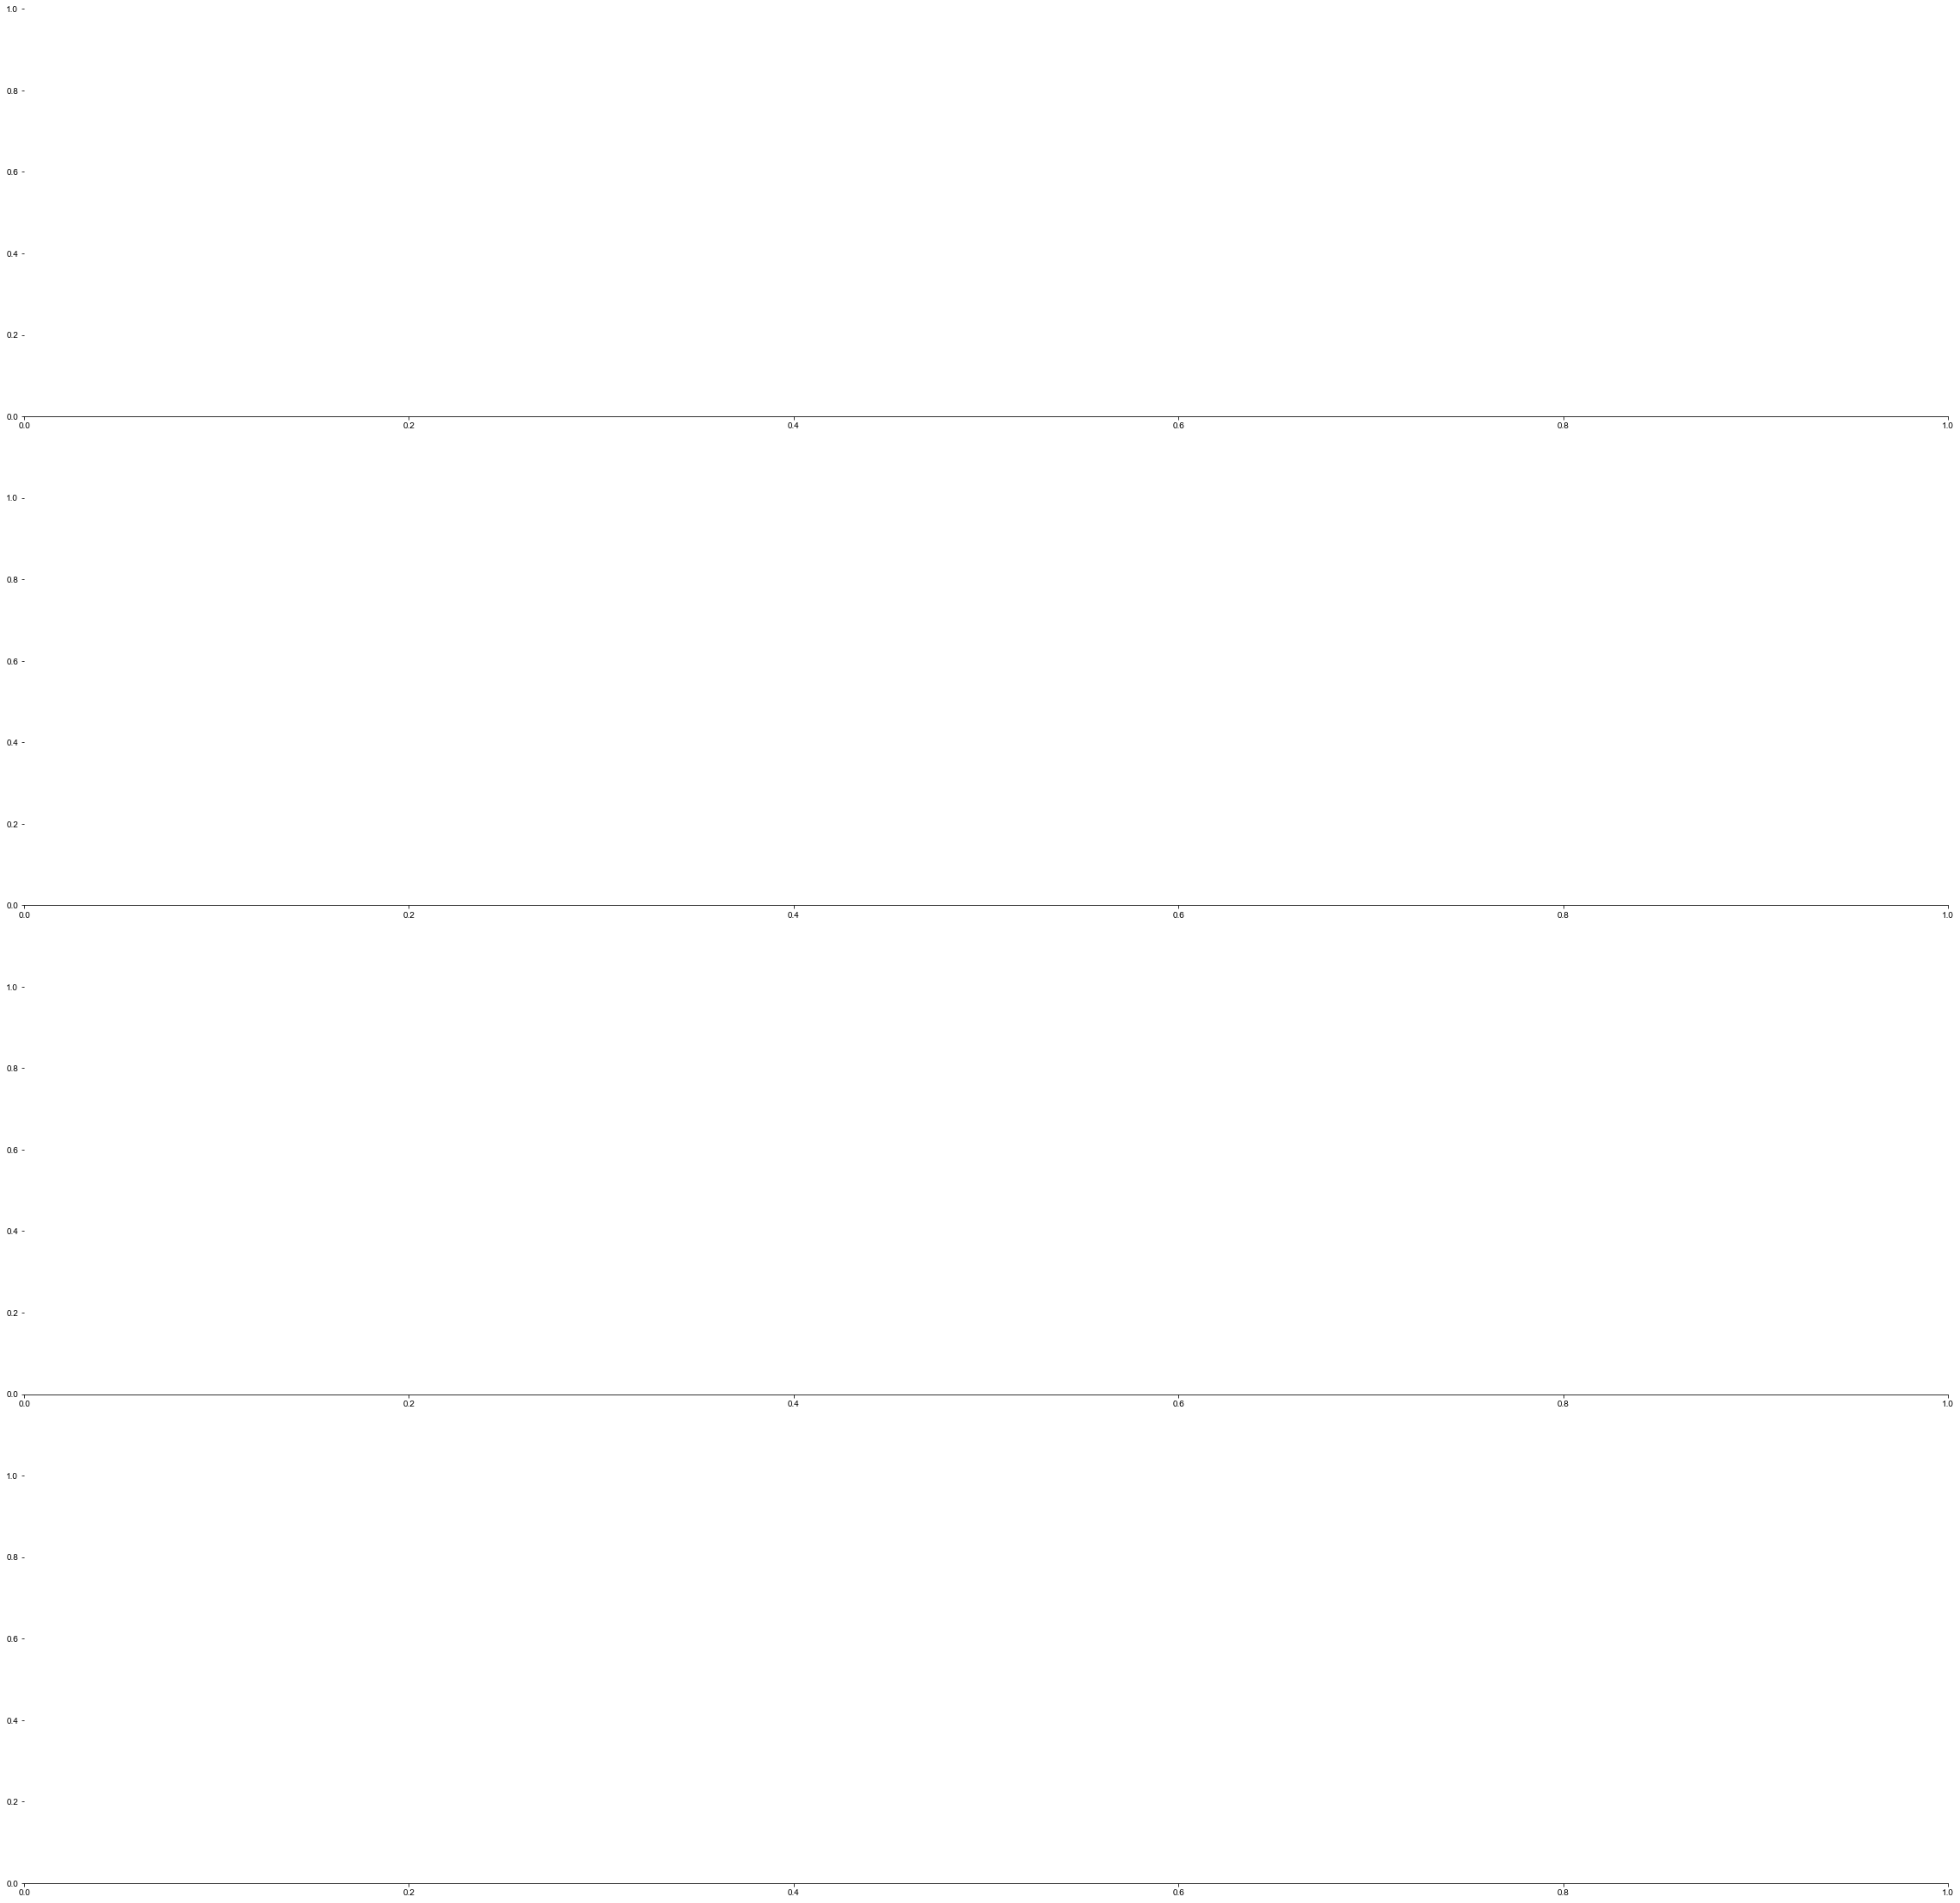

In [25]:
# 查看各个连续型特征的值随着时间的变化
# 成对的画图的特征有'MinTemp', 'MaxTemp' | 'WindSpeed9am', 'WindSpeed3pm' | 'Humidity9am', 'Humidity3pm'|'Pressure9am',
#    'Pressure3pm' | 'Temp9am', 'Temp3pm'

figure, axes = plt.subplots(4, 1, figsize=(40, 40))
sns.despine(left=True)
sns.set(style="darkgrid")

plot_y_list = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Evaporation', 'Sunshine',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Pressure3pm', 'Temp9am', 'Temp3pm'
]

plot_y = ['Rainfall', 'WindGustSpeed', 'Evaporation', 'Sunshine']
a = 0
b = 2

'''
0 0
0 1
1 0
1 1
'''
for index, feature in enumerate(plot_y):

    sns.lineplot(x=time_data.index[:50], y=plot_y[index], data=time_data.iloc[:50, :50], ax=axes[index, 0])
    plt.xlabel('Date')
plt.show()

In [ ]:
time_data.columns

In [26]:
# 'MinTemp', 'MaxTemp'
df_['Date'] = pd.to_datetime(df_['Date'])
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 24 columns):
Date             123710 non-null datetime64[ns]
Location         123710 non-null object
MinTemp          123710 non-null float64
MaxTemp          123710 non-null float64
Rainfall         123710 non-null float64
Evaporation      73063 non-null float64
Sunshine         67087 non-null float64
WindGustDir      123710 non-null object
WindGustSpeed    123710 non-null float64
WindDir9am       123710 non-null object
WindDir3pm       123710 non-null object
WindSpeed9am     123710 non-null float64
WindSpeed3pm     123710 non-null float64
Humidity9am      123710 non-null float64
Humidity3pm      123710 non-null float64
Pressure9am      123710 non-null float64
Pressure3pm      123710 non-null float64
Cloud9am         77476 non-null float64
Cloud3pm         75477 non-null float64
Temp9am          123710 non-null float64
Temp3pm          123710 non-null float64
RainToday        123710 non-n

d:\anaconda_file\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


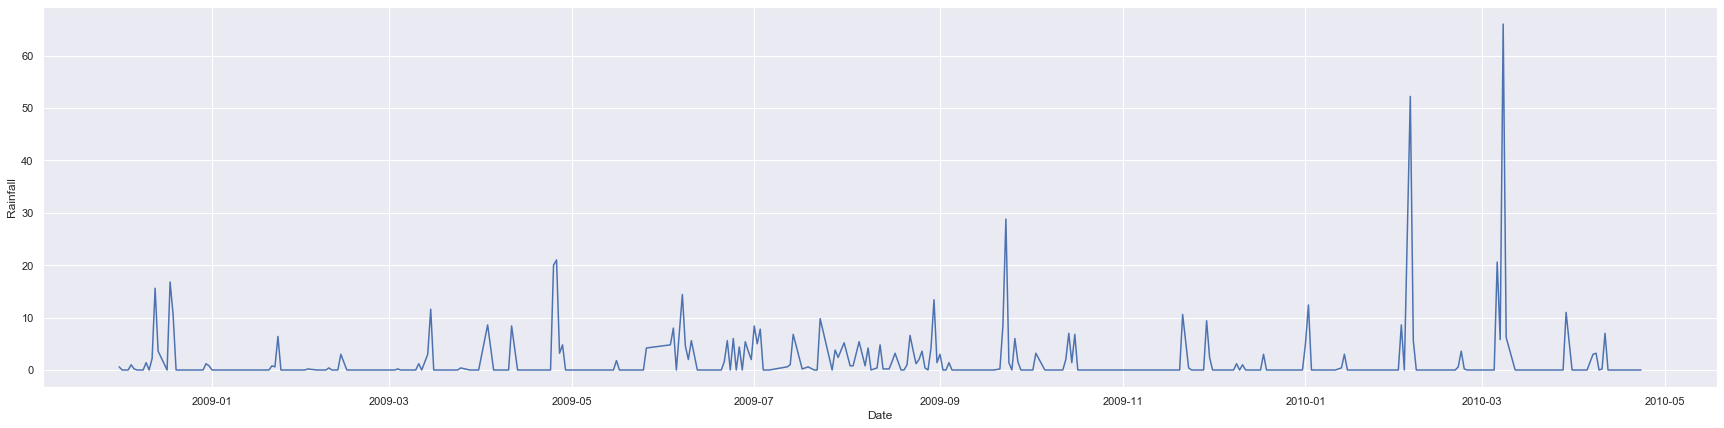

In [27]:
# from matplotlib import 

figure = plt.figure(figsize=(30, 7))
sns.set(style="darkgrid")
fmri = sns.load_dataset("fmri")

x_data = df_.loc[:500, :]['Date']
y_data = df_.loc[:500, :]['Rainfall']

sns.lineplot(x=x_data, y=y_data)
plt.xlabel('Date')
plt.show()

In [28]:
# 想法：提取出不同年的，对每一年进行画图
# 方法：直接提取出 timestamp 中的 year，作为一个 series 合并到原来的 dataframe 中

def find_year(arg):
    year = arg.year
    return year

test = df_.copy()

temp = test['Date'].apply(find_year)
test['year'] = temp

In [29]:
test['year'].value_counts()

2016    15602
2015    15306
2014    15132
2013    14230
2009    14015
2010    13860
2011    13202
2012    13169
2017     7412
2008     1721
2007       61
Name: year, dtype: int64

IndexError: index 10 is out of bounds for axis 0 with size 10

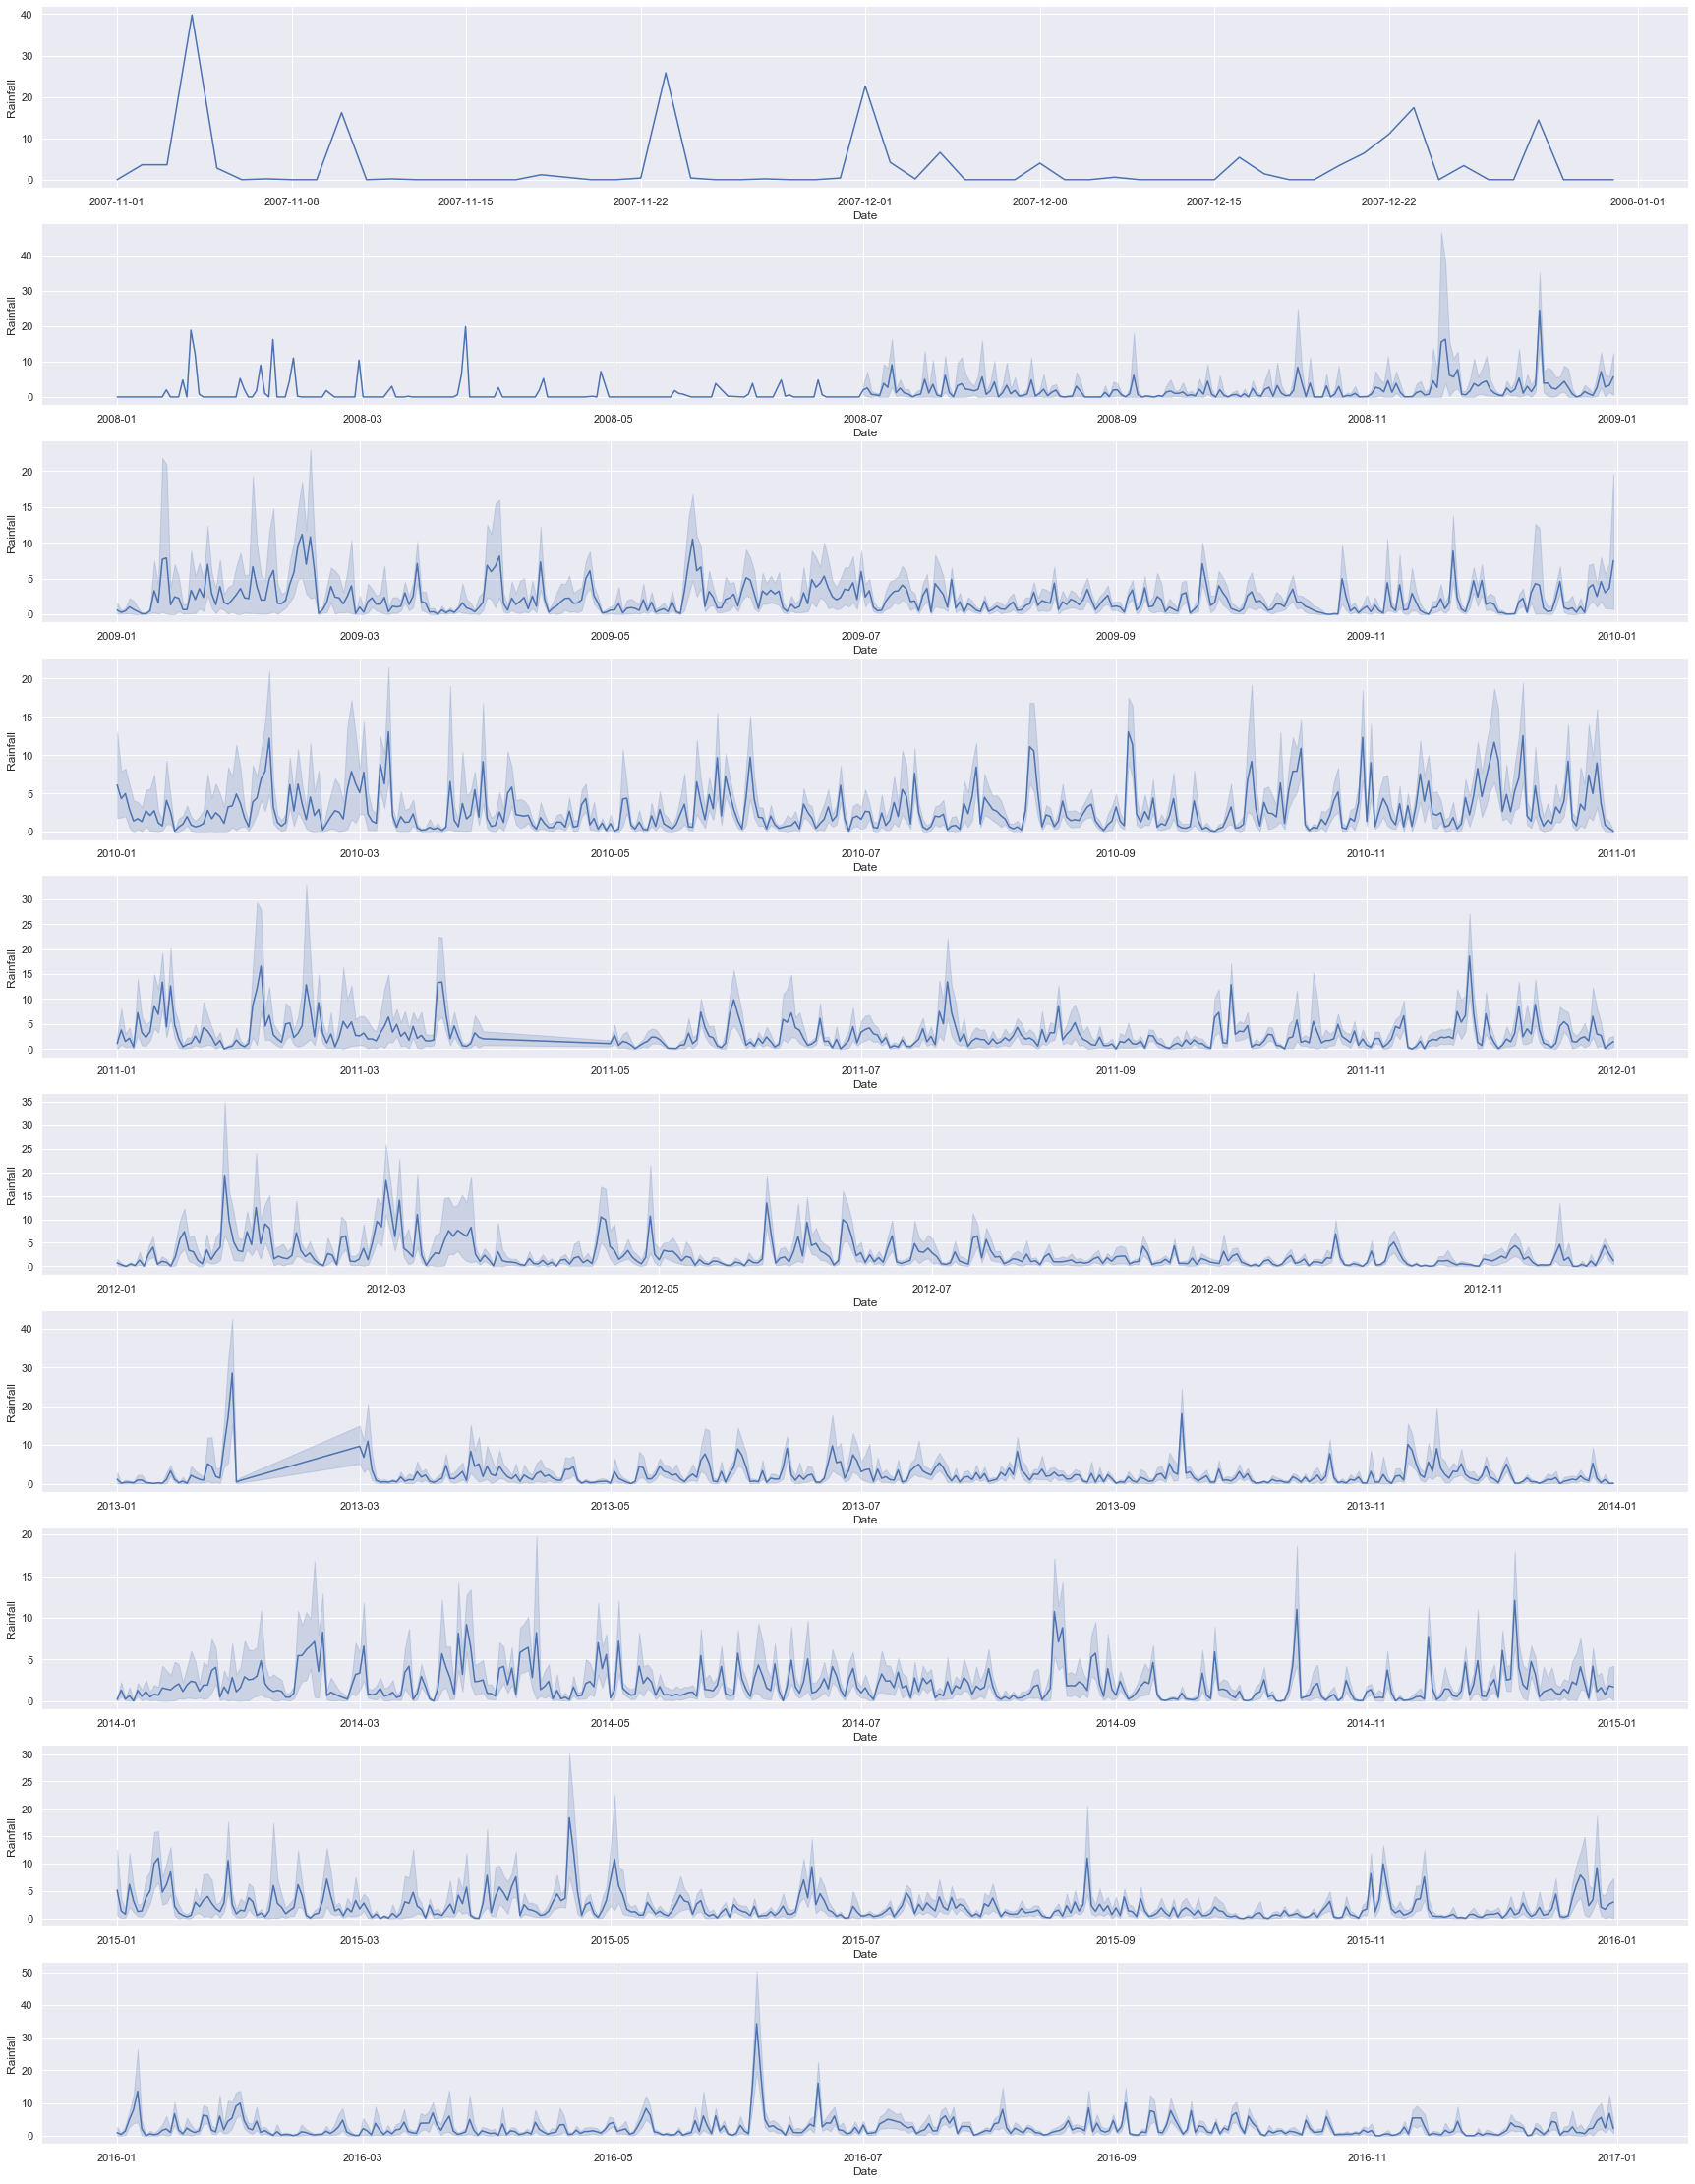

In [30]:
%%time

figure, axes = plt.subplots(10, 1, figsize=(30, 40))
sns.despine(left=True)
sns.set(style="darkgrid")

for index, year in enumerate(range(2007, 2018)):
    # 得到对应那一年的所有数据
    plot_data = test[test['year'] == year]
    x_data = plot_data['Date']
    y_data = plot_data['Rainfall']
#     break
    
    sns.lineplot(x=x_data, y=y_data, ax=axes[index])# 记住，只有一列的时候，axes不用传入列下标

plt.show()

关于各个指标随着日期变化的图例，其他的都加上去就行了

### **查看不同城市和降雨量之间的关系**

In [31]:
df_['Location'].value_counts()

Darwin              3119
Hobart              3106
Perth               3049
Brisbane            3029
MelbourneAirport    2943
SydneyAirport       2941
Cobar               2925
PerthAirport        2924
Woomera             2917
Mildura             2903
Cairns              2900
MountGambier        2898
Ballarat            2895
Portland            2890
Townsville          2884
NorfolkIsland       2868
SalmonGums          2865
GoldCoast           2832
Wollongong          2817
Nuriootpa           2812
WaggaWagga          2801
NorahHead           2790
Sale                2771
Canberra            2762
AliceSprings        2748
Adelaide            2746
Watsonia            2745
Bendigo             2725
Witchcliffe         2653
Moree               2635
CoffsHarbour        2568
MountGinini         2524
Walpole             2506
Launceston          2503
PearceRAAF          2469
BadgerysCreek       2458
Albury              2445
Dartmoor            2418
Penrith             2366
Tuggeranong         2322


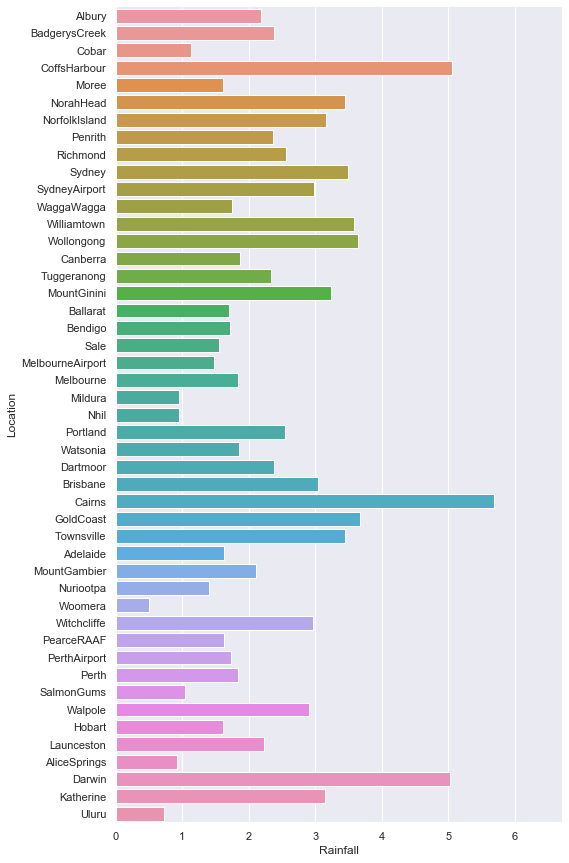

In [32]:
figure, axes = plt.subplots(figsize=(8, 15))

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

sns.barplot(y='Location', x='Rainfall', data=df_, errwidth=0) # errwidth=0表示不要柱子中间那条杠
sns.despine(left=True)

In [33]:
# df_.sort_values('Rainfall', ascending=False)
group_data = df_.groupby(by='Location').sum().sort_values(by='Rainfall', ascending=False)

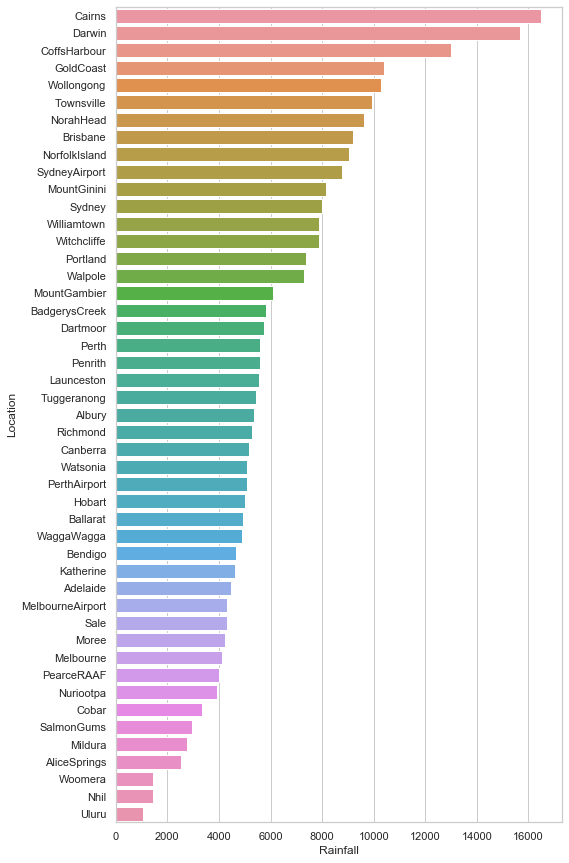

In [34]:
figure, axes = plt.subplots(figsize=(8, 15))

sns.barplot(y=group_data.index, x='Rainfall', data=group_data, errwidth=0)
plt.show()

## **建模预测**

**建模目的：预测明天是否会下雨**

### **特征选择**

In [35]:
# 去除冗余特征
# 因为是要预测明天是否会下雨，其实从其他的各项指标就可以推断出当前所在的月份（对应日期），地区也是一样
# 如前面所提到的，'Evaporation','Sunshine','Cloud3pm','Cloud9am'的缺失值太多，去掉这些特征为好

df_.drop(labels = ['Date','Location','Evaporation','Sunshine','Cloud3pm','Cloud9am','RISK_MM'],axis = 1,inplace = True)

In [36]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 17 columns):
MinTemp          123710 non-null float64
MaxTemp          123710 non-null float64
Rainfall         123710 non-null float64
WindGustDir      123710 non-null object
WindGustSpeed    123710 non-null float64
WindDir9am       123710 non-null object
WindDir3pm       123710 non-null object
WindSpeed9am     123710 non-null float64
WindSpeed3pm     123710 non-null float64
Humidity9am      123710 non-null float64
Humidity3pm      123710 non-null float64
Pressure9am      123710 non-null float64
Pressure3pm      123710 non-null float64
Temp9am          123710 non-null float64
Temp3pm          123710 non-null float64
RainToday        123710 non-null object
RainTomorrow     123710 non-null object
dtypes: float64(12), object(5)
memory usage: 22.0+ MB


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# df_['RainToday'] = LabelEncoder().fit_transform(df_['RainToday'])

df_['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

In [60]:
df_['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [61]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 17 columns):
MinTemp          123710 non-null float64
MaxTemp          123710 non-null float64
Rainfall         123710 non-null float64
WindGustDir      123710 non-null object
WindGustSpeed    123710 non-null float64
WindDir9am       123710 non-null object
WindDir3pm       123710 non-null object
WindSpeed9am     123710 non-null float64
WindSpeed3pm     123710 non-null float64
Humidity9am      123710 non-null float64
Humidity3pm      123710 non-null float64
Pressure9am      123710 non-null float64
Pressure3pm      123710 non-null float64
Temp9am          123710 non-null float64
Temp3pm          123710 non-null float64
RainToday        123710 non-null int64
RainTomorrow     123710 non-null int64
dtypes: float64(12), int64(2), object(3)
memory usage: 22.0+ MB


In [63]:
X = df_.loc[:, ['WindDir3pm', 'WindDir9am', 'WindGustDir']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 3 columns):
WindDir3pm     123710 non-null object
WindDir9am     123710 non-null object
WindGustDir    123710 non-null object
dtypes: object(3)
memory usage: 8.8+ MB


In [64]:
enc = OneHotEncoder(categories='auto').fit(X)
names = enc.get_feature_names()

In [65]:
enc

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [66]:
result = enc.transform(X)
result.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
# dataset = pd.get_dummies(dataset,columns = categorical,drop_first=True)
df_test = df_.copy()
df_test = pd.concat([df_test, pd.DataFrame(result.toarray())], axis=1)
df_test.drop(labels=['WindDir3pm', 'WindDir9am', 'WindGustDir'], axis=1, inplace=True)
df_test.shape

(140752, 62)

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140752 entries, 0 to 142192
Data columns (total 62 columns):
MinTemp          123710 non-null float64
MaxTemp          123710 non-null float64
Rainfall         123710 non-null float64
WindGustSpeed    123710 non-null float64
WindSpeed9am     123710 non-null float64
WindSpeed3pm     123710 non-null float64
Humidity9am      123710 non-null float64
Humidity3pm      123710 non-null float64
Pressure9am      123710 non-null float64
Pressure3pm      123710 non-null float64
Temp9am          123710 non-null float64
Temp3pm          123710 non-null float64
RainToday        123710 non-null float64
RainTomorrow     123710 non-null float64
0                123710 non-null float64
1                123710 non-null float64
2                123710 non-null float64
3                123710 non-null float64
4                123710 non-null float64
5                123710 non-null float64
6                123710 non-null float64
7                123710 non-

In [77]:
from sklearn.preprocessing import StandardScaler

X = df_test.drop(labels=['RainTomorrow'], axis=1)
Y = df_test['RainTomorrow']

In [80]:
# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.15488061, -0.07976966, -0.20821527, ...,  3.53276665,
        -0.25348459, -0.26815709],
       [-0.78751305,  0.22553705, -0.2785717 , ..., -0.28306427,
         3.945013  , -0.26815709],
       [ 0.07634781,  0.30880252, -0.2785717 , ..., -0.28306427,
        -0.25348459,  3.72915745],
       ...,
       [-1.38436237,  0.25329221, -0.2785717 , ...,         nan,
                nan,         nan],
       [-1.10164427,  0.47533345, -0.2785717 , ...,         nan,
                nan,         nan],
       [-0.72468681,  0.48921103, -0.2785717 , ...,         nan,
                nan,         nan]])

In [41]:
# dataset = pd.get_dummies(df_, columns=['WindGustDir','WindDir9am','WindDir3pm'], drop_first=True, )

In [43]:
# dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 142192
Data columns (total 59 columns):
MinTemp            123710 non-null float64
MaxTemp            123710 non-null float64
Rainfall           123710 non-null float64
WindGustSpeed      123710 non-null float64
WindSpeed9am       123710 non-null float64
WindSpeed3pm       123710 non-null float64
Humidity9am        123710 non-null float64
Humidity3pm        123710 non-null float64
Pressure9am        123710 non-null float64
Pressure3pm        123710 non-null float64
Temp9am            123710 non-null float64
Temp3pm            123710 non-null float64
RainToday          123710 non-null object
RainTomorrow       123710 non-null int64
WindGustDir_ENE    123710 non-null uint8
WindGustDir_ESE    123710 non-null uint8
WindGustDir_N      123710 non-null uint8
WindGustDir_NE     123710 non-null uint8
WindGustDir_NNE    123710 non-null uint8
WindGustDir_NNW    123710 non-null uint8
WindGustDir_NW     123710 non-null uint8
Win

In [56]:
x = dataset.drop(labels=['RainTomorrow'], axis=1)
y = dataset['RainTomorrow']

In [57]:
x['RainToday'] = x['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [58]:
x.shape

(123710, 58)

In [59]:
x.dropna().shape

(0, 58)

In [52]:
# 标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

d:\anaconda_file\lib\site-packages\sklearn\utils\extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\anaconda_file\lib\site-packages\sklearn\utils\extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[ 0.15488061, -0.07976966, -0.20821527, ..., -0.27976905,
         3.82721954, -0.26962616],
       [-0.78751305,  0.22553705, -0.2785717 , ..., -0.27976905,
        -0.26128629,  3.70883899],
       [ 0.07634781,  0.30880252, -0.2785717 , ..., -0.27976905,
        -0.26128629,  3.70883899],
       ...,
       [-1.38436237,  0.25329221, -0.2785717 , ..., -0.27976905,
        -0.26128629, -0.26962616],
       [-1.10164427,  0.47533345, -0.2785717 , ..., -0.27976905,
         3.82721954, -0.26962616],
       [-0.72468681,  0.48921103, -0.2785717 , ..., -0.27976905,
        -0.26128629, -0.26962616]])

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=1000)
cross_val_score(rfc, x_train, y_train, cv=10)

d:\anaconda_file\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').